In [1]:
import numpy as np
def polygonize(lengths):
    '''
    Returns coordinates for the polygon vertexes used in cyclical TS construction,
    as a list of vector couples specifying starting and ending point of each pivot 
    vector. For bimolecular TSs, returns vertexes for the centered superposition of
    two segments. For trimolecular TSs, returns triangle vertexes.

    :params vertexes: list of floats, used as polygon side lenghts.
    :return vertexes_out: list of vectors couples (start, end)
    '''
    assert len(lengths) in (2,3)
    lengths = sorted(lengths)
    arr = np.zeros((len(lengths),2,3))

    if len(lengths) == 2:
        arr[0,0] = np.array([-lengths[0]/2,0,0])
        arr[0,1] = np.array([+lengths[0]/2,0,0])
        arr[1,0] = np.array([-lengths[1]/2,0,0])
        arr[1,1] = np.array([+lengths[1]/2,0,0])

        vertexes_out = np.vstack(([arr],[arr]))
        vertexes_out[1,1] *= -1
        # THIS WORKS

    else:
        arr[0,1] = np.array([lengths[0],0,0])
        arr[1,0] = np.array([lengths[0],0,0])

        a = np.power(lengths[0], 2)
        b = np.power(lengths[1], 2)
        c = np.power(lengths[2], 2)
        x = (a-b+c)/(2*a**0.5)
        y = (c-x**2)**0.5

        arr[1,1] = np.array([x,y,0])
        arr[2,0] = np.array([x,y,0])

        vertexes_out = np.vstack(([arr],[arr],[arr],[arr],
                                  [arr],[arr],[arr],[arr]))

        swaps = [(1,2),(2,1),(3,1),(3,2),(4,0),(5,0),(5,1),(6,0),(6,2),(7,0),(7,1),(7,2)]

        for t,v in swaps:
            # triangle, vector couples to be swapped
            vertexes_out[t,v][[0,1]] = vertexes_out[t,v][[1,0]]

    return vertexes_out

In [2]:
w = polygonize([3,4,5])

In [3]:
# for vecs in polygonize([3,4]):
#     for start, end in vecs:
#         print(np.linalg.norm(start-end))
#     print()

for vecs in polygonize([3,4,5]):
    for start, end in vecs:
        print(np.linalg.norm(start-end))
    print()

3.0
4.0
5.0

3.0
4.0
5.0

3.0
4.0
5.0

3.0
4.0
5.0

3.0
4.0
5.0

3.0
4.0
5.0

3.0
4.0
5.0

3.0
4.0
5.0



In [4]:
arr = np.array([3,2])
np.power(np.sum(arr**2), 0.5)

3.605551275463989

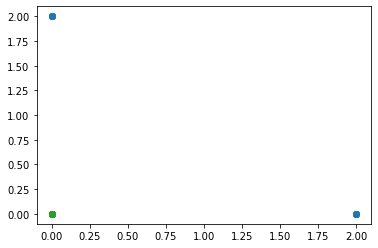

In [5]:
import matplotlib.pyplot as plt
l = [4,3,2]
vecs = polygonize(l)
x = [v[0,0] for v in vecs]
y = [v[0,1] for v in vecs]

fig = plt.figure()
plot = plt.plot(x,y,'o')
plt.show()

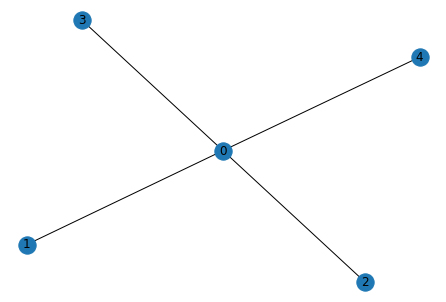

In [6]:
import networkx as nx
from hypermolecule_class import Hypermolecule

mol = Hypermolecule('Resources/SN2/CH3Br_ensemble.xyz', 0)
labels_dict = {i:i for i, n in enumerate(mol.atomnos)}
nx.draw(mol.graph, labels=labels_dict)

In [7]:
bonds = [(a, b) for a, b in list(mol.graph.edges) if a != b]
bonds

[(0, 1), (0, 2), (0, 3), (0, 4)]

In [8]:
# np.vstack((np.array([0,0,0]) for _ in range(2)))
a = np.array([1,1,1])
np.vstack((a for _ in range(3)))

ipykernel_launcher:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [9]:
def external_versors(vertexes):
    '''
    '''
    assert vertexes.shape[0] in (2,3)
    
    if vertexes.shape[0] == 2:
        return
    else:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-9-dc16a25d86e2>, line 9)

In [14]:
from main import rot_mat_from_pointer
rot_mat_from_pointer(np.array([0,1,0]),90)

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [-1.,  0.,  0.]])

In [22]:
from main import cartesian_product
n = 6
c = cartesian_product(*[range(n) for _ in range(3)]) * 360/n
len(c)

216

In [68]:
a = np.array([1.,1.2,1.]) * 3
b = [a, 2*a, 3*a-0.5, 4*a-9, 5*a]
c = 2*a
[np.all(r) for r in b == c].index(True)

1